In [94]:
import torch
from torch.autograd import Variable
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from pandas import read_csv, DataFrame
from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense,Dropout
from tensorflow.keras.models import Model

# Loading the Dataset(UCI)

In [29]:
seq_data =pd.read_csv("data.csv")
seq_data= seq_data.drop(['Unnamed: 0'],axis=1)

In [30]:
labels = pd.read_csv("labels.csv")
labels=labels.drop(['Unnamed: 0'],axis=1)


In [31]:
ncol = seq_data.shape[1]

# Splitting The Data Into Test and Train

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(seq_data, labels, train_size = 0.8, random_state = 42)

# Defining the DEEP AUTOENCODER

In [142]:
input_dim = Input(shape = (ncol, ))
# DEFINE THE DIMENSION OF ENCODER ASSUMED 3
encoding_dim = 15
# ENCODING LAYERS OF THE AUTOENCODER
encoded1 = Dense(40, activation = 'relu')(input_dim)
encoded2 = Dense(20, activation = 'relu')(encoded1)
encoded3 = Dense(10, activation = 'relu')(encoded2)
encoded4 = Dense(encoding_dim, activation = 'relu')(encoded3)
# DECODING LAYERS OF THE AUTOENCODER
decoded1 = Dense(10, activation = 'relu')(encoded4)
decoded2 = Dense(20, activation = 'relu')(decoded1)
decoded3 = Dense(40, activation = 'relu')(decoded2)
decoded4 = Dense(ncol, activation = 'sigmoid')(decoded3)
# COMBINING THE  ENCODING  AND DECODING LAYERS INTO AN AUTOENCODER MODEL
autoencoder = Model(input_dim, decoded4)
autoencoder.summary()
# CONFIGURING AND TRAINING THE AUTOENCODER
autoencoder.compile(optimizer = 'sgd', loss = 'binary_crossentropy')
History=autoencoder.fit(X_train, X_train, epochs =4, batch_size =100)
#EXTRACTING THE DATA WITH REDUCED DIMENSIONALITY FROM THE CONFIGURED AND TRAINED AUTOENCODER
encoder = Model(input_dim, encoded4)
encoded_input = Input(shape = (encoding_dim, ))
encoded_out = encoder.predict(X_test)
#validation_data = (X_test, X_test)

Model: "model_100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_101 (InputLayer)       [(None, 20531)]           0         
_________________________________________________________________
dense_495 (Dense)            (None, 40)                821280    
_________________________________________________________________
dense_496 (Dense)            (None, 20)                820       
_________________________________________________________________
dense_497 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_498 (Dense)            (None, 15)                165       
_________________________________________________________________
dense_499 (Dense)            (None, 10)                160       
_________________________________________________________________
dense_500 (Dense)            (None, 20)                22

Evaluating the Deep Autoencoder

In [145]:
loss = History.history['loss']
print("Loss ", loss[3])

Loss  0.1651866112370044


Extracting the encoded data

In [146]:

encoded_out = encoder.predict(seq_data)


# Defining the CNN Classifier

In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM
model = Sequential()
model.add(Embedding(2939, 32, input_length=15))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size = 3))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(173,activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 15, 32)            94048     
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 11, 128)           20608     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 3, 128)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 128)            0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 384)               0         
_________________________________________________________________
dense_505 (Dense)            (None, 50)                19250     
_________________________________________________________________
dense_506 (Dense)            (None, 173)             

In [149]:
labels=np.asarray(labels)
labels=np.where(labels=='PRAD', 1, labels) 
labels=np.where(labels=='LUAD', 2, labels) 
labels=np.where(labels=='BRCA', 3, labels) 
labels=np.where(labels=='KIRC', 4, labels) 
labels=np.where(labels=='COAD', 5, labels)
dfencoded_out=pd.DataFrame(encoded_out)
dlabels=pd.DataFrame(labels)
train1, test1, train2, test2 = train_test_split(dfencoded_out, dlabels,train_size = 0.8,random_state =0)

Training the Classifier

In [150]:
model.fit(train1, train2, epochs=150,verbose = 1, batch_size=16)

Train on 640 samples
Epoch 1/150
640/640 [==============================] - ETA: 3:40 - loss: 5.1507 - accuracy: 0.0000e+ - ETA: 1:58 - loss: 5.1434 - accuracy: 0.0000e+ - ETA: 1:19 - loss: 5.1340 - accuracy: 0.0833   - ETA: 1:00 - loss: 5.1241 - accuracy: 0.20 - ETA: 48s - loss: 5.1171 - accuracy: 0.2000 - ETA: 33s - loss: 5.0965 - accuracy: 0.196 - ETA: 24s - loss: 5.0731 - accuracy: 0.201 - ETA: 19s - loss: 5.0447 - accuracy: 0.233 - ETA: 17s - loss: 5.0298 - accuracy: 0.239 - ETA: 12s - loss: 4.9735 - accuracy: 0.266 - ETA: 9s - loss: 4.8960 - accuracy: 0.291 - ETA: 6s - loss: 4.7954 - accuracy: 0.29 - ETA: 4s - loss: 4.6030 - accuracy: 0.31 - ETA: 3s - loss: 4.4876 - accuracy: 0.31 - ETA: 2s - loss: 4.3543 - accuracy: 0.32 - ETA: 2s - loss: 4.2075 - accuracy: 0.32 - ETA: 1s - loss: 4.0300 - accuracy: 0.32 - ETA: 0s - loss: 3.7731 - accuracy: 0.34 - 8s 13ms/sample - loss: 3.6720 - accuracy: 0.3469
Epoch 2/150
640/640 [==============================] - ETA: 0s - loss: 1.7846 - accur

640/640 [==============================] - ETA: 0s - loss: 0.6498 - accuracy: 0.81 - ETA: 0s - loss: 0.7557 - accuracy: 0.70 - ETA: 0s - loss: 0.7287 - accuracy: 0.69 - ETA: 0s - loss: 0.7815 - accuracy: 0.69 - ETA: 0s - loss: 0.7797 - accuracy: 0.70 - ETA: 0s - loss: 0.7596 - accuracy: 0.72 - ETA: 0s - loss: 0.7658 - accuracy: 0.72 - ETA: 0s - loss: 0.7655 - accuracy: 0.71 - ETA: 0s - loss: 0.7563 - accuracy: 0.71 - ETA: 0s - loss: 0.7538 - accuracy: 0.72 - ETA: 0s - loss: 0.7528 - accuracy: 0.72 - ETA: 0s - loss: 0.7699 - accuracy: 0.71 - ETA: 0s - loss: 0.7695 - accuracy: 0.71 - ETA: 0s - loss: 0.7647 - accuracy: 0.71 - 1s 1ms/sample - loss: 0.7624 - accuracy: 0.7125
Epoch 14/150
640/640 [==============================] - ETA: 0s - loss: 0.5647 - accuracy: 0.81 - ETA: 0s - loss: 0.6025 - accuracy: 0.81 - ETA: 0s - loss: 0.6819 - accuracy: 0.71 - ETA: 0s - loss: 0.6753 - accuracy: 0.72 - ETA: 0s - loss: 0.6976 - accuracy: 0.70 - ETA: 0s - loss: 0.7274 - accuracy: 0.68 - ETA: 0s - los

640/640 [==============================] - ETA: 0s - loss: 0.2882 - accuracy: 1.00 - ETA: 0s - loss: 0.5114 - accuracy: 0.78 - ETA: 0s - loss: 0.5730 - accuracy: 0.77 - ETA: 0s - loss: 0.6145 - accuracy: 0.74 - ETA: 0s - loss: 0.6179 - accuracy: 0.74 - ETA: 0s - loss: 0.6078 - accuracy: 0.74 - ETA: 0s - loss: 0.5826 - accuracy: 0.76 - ETA: 0s - loss: 0.5933 - accuracy: 0.76 - ETA: 0s - loss: 0.5992 - accuracy: 0.76 - ETA: 0s - loss: 0.5956 - accuracy: 0.76 - ETA: 0s - loss: 0.6142 - accuracy: 0.75 - ETA: 0s - loss: 0.6143 - accuracy: 0.75 - ETA: 0s - loss: 0.6158 - accuracy: 0.75 - 1s 1ms/sample - loss: 0.6190 - accuracy: 0.7563
Epoch 28/150
640/640 [==============================] - ETA: 0s - loss: 0.9821 - accuracy: 0.62 - ETA: 0s - loss: 0.6471 - accuracy: 0.76 - ETA: 0s - loss: 0.5735 - accuracy: 0.78 - ETA: 0s - loss: 0.5327 - accuracy: 0.78 - ETA: 0s - loss: 0.5745 - accuracy: 0.76 - ETA: 0s - loss: 0.5830 - accuracy: 0.77 - ETA: 0s - loss: 0.6204 - accuracy: 0.75 - ETA: 0s - los

640/640 [==============================] - ETA: 0s - loss: 0.4722 - accuracy: 0.87 - ETA: 0s - loss: 0.4537 - accuracy: 0.86 - ETA: 0s - loss: 0.4948 - accuracy: 0.79 - ETA: 0s - loss: 0.4726 - accuracy: 0.81 - ETA: 0s - loss: 0.4799 - accuracy: 0.81 - ETA: 0s - loss: 0.5112 - accuracy: 0.78 - ETA: 0s - loss: 0.5082 - accuracy: 0.79 - ETA: 0s - loss: 0.5104 - accuracy: 0.80 - ETA: 0s - loss: 0.5037 - accuracy: 0.80 - ETA: 0s - loss: 0.5021 - accuracy: 0.80 - ETA: 0s - loss: 0.5172 - accuracy: 0.79 - 1s 972us/sample - loss: 0.5207 - accuracy: 0.7891
Epoch 41/150
640/640 [==============================] - ETA: 0s - loss: 0.4496 - accuracy: 0.87 - ETA: 0s - loss: 0.4792 - accuracy: 0.83 - ETA: 0s - loss: 0.4942 - accuracy: 0.82 - ETA: 0s - loss: 0.5009 - accuracy: 0.80 - ETA: 0s - loss: 0.4839 - accuracy: 0.81 - ETA: 0s - loss: 0.4950 - accuracy: 0.80 - ETA: 0s - loss: 0.4805 - accuracy: 0.81 - ETA: 0s - loss: 0.5023 - accuracy: 0.80 - ETA: 0s - loss: 0.5120 - accuracy: 0.80 - ETA: 0s - l

640/640 [==============================] - ETA: 0s - loss: 0.5116 - accuracy: 0.75 - ETA: 0s - loss: 0.3590 - accuracy: 0.87 - ETA: 0s - loss: 0.3894 - accuracy: 0.86 - ETA: 0s - loss: 0.4170 - accuracy: 0.85 - ETA: 0s - loss: 0.4115 - accuracy: 0.85 - ETA: 0s - loss: 0.4184 - accuracy: 0.84 - ETA: 0s - loss: 0.4505 - accuracy: 0.83 - ETA: 0s - loss: 0.4649 - accuracy: 0.80 - ETA: 0s - loss: 0.4624 - accuracy: 0.81 - ETA: 0s - loss: 0.4631 - accuracy: 0.80 - ETA: 0s - loss: 0.4497 - accuracy: 0.81 - 1s 1ms/sample - loss: 0.4576 - accuracy: 0.8125
Epoch 56/150
640/640 [==============================] - ETA: 0s - loss: 0.4268 - accuracy: 0.87 - ETA: 0s - loss: 0.3508 - accuracy: 0.85 - ETA: 0s - loss: 0.3881 - accuracy: 0.86 - ETA: 0s - loss: 0.3781 - accuracy: 0.87 - ETA: 0s - loss: 0.3872 - accuracy: 0.85 - ETA: 0s - loss: 0.3914 - accuracy: 0.84 - ETA: 0s - loss: 0.4230 - accuracy: 0.81 - ETA: 0s - loss: 0.4444 - accuracy: 0.81 - ETA: 0s - loss: 0.4528 - accuracy: 0.80 - ETA: 0s - los

640/640 [==============================] - ETA: 0s - loss: 0.4528 - accuracy: 0.81 - ETA: 0s - loss: 0.3195 - accuracy: 0.88 - ETA: 0s - loss: 0.3390 - accuracy: 0.87 - ETA: 0s - loss: 0.3777 - accuracy: 0.85 - ETA: 0s - loss: 0.3551 - accuracy: 0.87 - ETA: 0s - loss: 0.3760 - accuracy: 0.85 - ETA: 0s - loss: 0.3688 - accuracy: 0.85 - ETA: 0s - loss: 0.3717 - accuracy: 0.85 - ETA: 0s - loss: 0.3771 - accuracy: 0.85 - ETA: 0s - loss: 0.3893 - accuracy: 0.84 - 1s 905us/sample - loss: 0.4008 - accuracy: 0.8406
Epoch 70/150
640/640 [==============================] - ETA: 0s - loss: 0.5094 - accuracy: 0.75 - ETA: 0s - loss: 0.4153 - accuracy: 0.80 - ETA: 0s - loss: 0.4006 - accuracy: 0.81 - ETA: 0s - loss: 0.4357 - accuracy: 0.79 - ETA: 0s - loss: 0.4038 - accuracy: 0.82 - ETA: 0s - loss: 0.4178 - accuracy: 0.82 - ETA: 0s - loss: 0.4152 - accuracy: 0.82 - ETA: 0s - loss: 0.3997 - accuracy: 0.82 - ETA: 0s - loss: 0.3877 - accuracy: 0.83 - ETA: 0s - loss: 0.3952 - accuracy: 0.82 - 1s 865us/sa

640/640 [==============================] - ETA: 0s - loss: 0.2263 - accuracy: 0.93 - ETA: 0s - loss: 0.2808 - accuracy: 0.88 - ETA: 0s - loss: 0.3874 - accuracy: 0.83 - ETA: 0s - loss: 0.3597 - accuracy: 0.84 - ETA: 0s - loss: 0.3468 - accuracy: 0.85 - ETA: 0s - loss: 0.3387 - accuracy: 0.85 - ETA: 0s - loss: 0.3528 - accuracy: 0.85 - ETA: 0s - loss: 0.3628 - accuracy: 0.85 - 0s 672us/sample - loss: 0.3650 - accuracy: 0.8500
Epoch 87/150
640/640 [==============================] - ETA: 0s - loss: 0.2040 - accuracy: 0.93 - ETA: 0s - loss: 0.3539 - accuracy: 0.85 - ETA: 0s - loss: 0.3316 - accuracy: 0.86 - ETA: 0s - loss: 0.2898 - accuracy: 0.89 - ETA: 0s - loss: 0.3302 - accuracy: 0.87 - ETA: 0s - loss: 0.3489 - accuracy: 0.86 - ETA: 0s - loss: 0.3503 - accuracy: 0.86 - 0s 649us/sample - loss: 0.3702 - accuracy: 0.8547
Epoch 88/150
640/640 [==============================] - ETA: 0s - loss: 0.3267 - accuracy: 0.81 - ETA: 0s - loss: 0.2966 - accuracy: 0.85 - ETA: 0s - loss: 0.3299 - accura

640/640 [==============================] - ETA: 0s - loss: 0.2062 - accuracy: 0.87 - ETA: 0s - loss: 0.2312 - accuracy: 0.90 - ETA: 0s - loss: 0.2634 - accuracy: 0.88 - ETA: 0s - loss: 0.2909 - accuracy: 0.86 - ETA: 0s - loss: 0.2904 - accuracy: 0.85 - ETA: 0s - loss: 0.2944 - accuracy: 0.85 - ETA: 0s - loss: 0.2860 - accuracy: 0.86 - ETA: 0s - loss: 0.3129 - accuracy: 0.85 - ETA: 0s - loss: 0.3113 - accuracy: 0.85 - ETA: 0s - loss: 0.3301 - accuracy: 0.85 - 1s 901us/sample - loss: 0.3404 - accuracy: 0.8469
Epoch 102/150
640/640 [==============================] - ETA: 0s - loss: 0.4501 - accuracy: 0.81 - ETA: 0s - loss: 0.3904 - accuracy: 0.82 - ETA: 0s - loss: 0.3737 - accuracy: 0.83 - ETA: 0s - loss: 0.3435 - accuracy: 0.84 - ETA: 0s - loss: 0.3546 - accuracy: 0.83 - ETA: 0s - loss: 0.3624 - accuracy: 0.83 - ETA: 0s - loss: 0.3609 - accuracy: 0.83 - ETA: 0s - loss: 0.3607 - accuracy: 0.83 - ETA: 0s - loss: 0.3559 - accuracy: 0.83 - ETA: 0s - loss: 0.3502 - accuracy: 0.85 - 1s 892us/s

Epoch 116/150
640/640 [==============================] - ETA: 0s - loss: 0.5619 - accuracy: 0.87 - ETA: 0s - loss: 0.3997 - accuracy: 0.84 - ETA: 0s - loss: 0.3817 - accuracy: 0.83 - ETA: 0s - loss: 0.3801 - accuracy: 0.83 - ETA: 0s - loss: 0.3529 - accuracy: 0.84 - ETA: 0s - loss: 0.3410 - accuracy: 0.85 - ETA: 0s - loss: 0.3341 - accuracy: 0.85 - ETA: 0s - loss: 0.3389 - accuracy: 0.85 - ETA: 0s - loss: 0.3386 - accuracy: 0.85 - ETA: 0s - loss: 0.3353 - accuracy: 0.85 - 1s 867us/sample - loss: 0.3414 - accuracy: 0.8547
Epoch 117/150
640/640 [==============================] - ETA: 0s - loss: 0.0996 - accuracy: 0.93 - ETA: 0s - loss: 0.2335 - accuracy: 0.89 - ETA: 0s - loss: 0.2758 - accuracy: 0.87 - ETA: 0s - loss: 0.2801 - accuracy: 0.87 - ETA: 0s - loss: 0.2787 - accuracy: 0.88 - ETA: 0s - loss: 0.2771 - accuracy: 0.88 - ETA: 0s - loss: 0.2794 - accuracy: 0.88 - ETA: 0s - loss: 0.2838 - accuracy: 0.87 - ETA: 0s - loss: 0.3007 - accuracy: 0.87 - ETA: 0s - loss: 0.3151 - accuracy: 0.8

640/640 [==============================] - ETA: 0s - loss: 0.1983 - accuracy: 0.93 - ETA: 0s - loss: 0.2645 - accuracy: 0.90 - ETA: 0s - loss: 0.3299 - accuracy: 0.88 - ETA: 0s - loss: 0.3015 - accuracy: 0.88 - ETA: 0s - loss: 0.3131 - accuracy: 0.87 - ETA: 0s - loss: 0.2931 - accuracy: 0.88 - ETA: 0s - loss: 0.2863 - accuracy: 0.88 - ETA: 0s - loss: 0.2849 - accuracy: 0.88 - ETA: 0s - loss: 0.2909 - accuracy: 0.87 - 1s 813us/sample - loss: 0.2841 - accuracy: 0.8797
Epoch 132/150
640/640 [==============================] - ETA: 0s - loss: 0.2350 - accuracy: 0.87 - ETA: 0s - loss: 0.2401 - accuracy: 0.88 - ETA: 0s - loss: 0.2675 - accuracy: 0.87 - ETA: 0s - loss: 0.2739 - accuracy: 0.87 - ETA: 0s - loss: 0.2704 - accuracy: 0.87 - ETA: 0s - loss: 0.2564 - accuracy: 0.88 - ETA: 0s - loss: 0.2549 - accuracy: 0.88 - ETA: 0s - loss: 0.2636 - accuracy: 0.88 - ETA: 0s - loss: 0.2775 - accuracy: 0.87 - ETA: 0s - loss: 0.2805 - accuracy: 0.87 - 1s 862us/sample - loss: 0.2787 - accuracy: 0.8781
Ep

640/640 [==============================] - ETA: 0s - loss: 0.3194 - accuracy: 0.93 - ETA: 0s - loss: 0.2563 - accuracy: 0.90 - ETA: 0s - loss: 0.2360 - accuracy: 0.89 - ETA: 0s - loss: 0.2648 - accuracy: 0.87 - ETA: 0s - loss: 0.2381 - accuracy: 0.88 - ETA: 0s - loss: 0.2463 - accuracy: 0.88 - ETA: 0s - loss: 0.2730 - accuracy: 0.87 - ETA: 0s - loss: 0.2713 - accuracy: 0.87 - ETA: 0s - loss: 0.2831 - accuracy: 0.86 - ETA: 0s - loss: 0.2802 - accuracy: 0.86 - ETA: 0s - loss: 0.2829 - accuracy: 0.86 - ETA: 0s - loss: 0.2937 - accuracy: 0.86 - 1s 1ms/sample - loss: 0.2907 - accuracy: 0.8625
Epoch 146/150
640/640 [==============================] - ETA: 0s - loss: 0.1802 - accuracy: 0.93 - ETA: 0s - loss: 0.2949 - accuracy: 0.89 - ETA: 0s - loss: 0.2771 - accuracy: 0.89 - ETA: 0s - loss: 0.3125 - accuracy: 0.88 - ETA: 0s - loss: 0.2848 - accuracy: 0.89 - ETA: 0s - loss: 0.2743 - accuracy: 0.89 - ETA: 0s - loss: 0.2623 - accuracy: 0.89 - ETA: 0s - loss: 0.2485 - accuracy: 0.90 - ETA: 0s - lo

Evaluating the CNN classifier

In [153]:
scores=model.evaluate(train1,train2,verbose=1)
print("Accuracy: ", scores[1])

640/640 [==============================] - ETA: 0s - loss: 0.2282 - accuracy: 0.93 - ETA: 0s - loss: 0.2106 - accuracy: 0.92 - ETA: 0s - loss: 0.2241 - accuracy: 0.91 - 0s 253us/sample - loss: 0.2190 - accuracy: 0.9109
Accuracy:  0.9109375


# Pairwise Clustering

In [154]:
indices = []
for i in range(dfencoded_out.shape[0]):
    indices.append("sample" + str(i))

In [155]:
columns = []
for i in range(15):
    columns.append("col" + str(i)) 

In [156]:
df_e = pd.DataFrame(data=encoded_out, index=indices, columns=columns)

In [157]:
df_l = pd.DataFrame(data=labels, index=indices, columns=["label"])
columns.append("label")

In [158]:
cluster_pd = pd.concat([df_e,df_l], axis=1, sort=False)

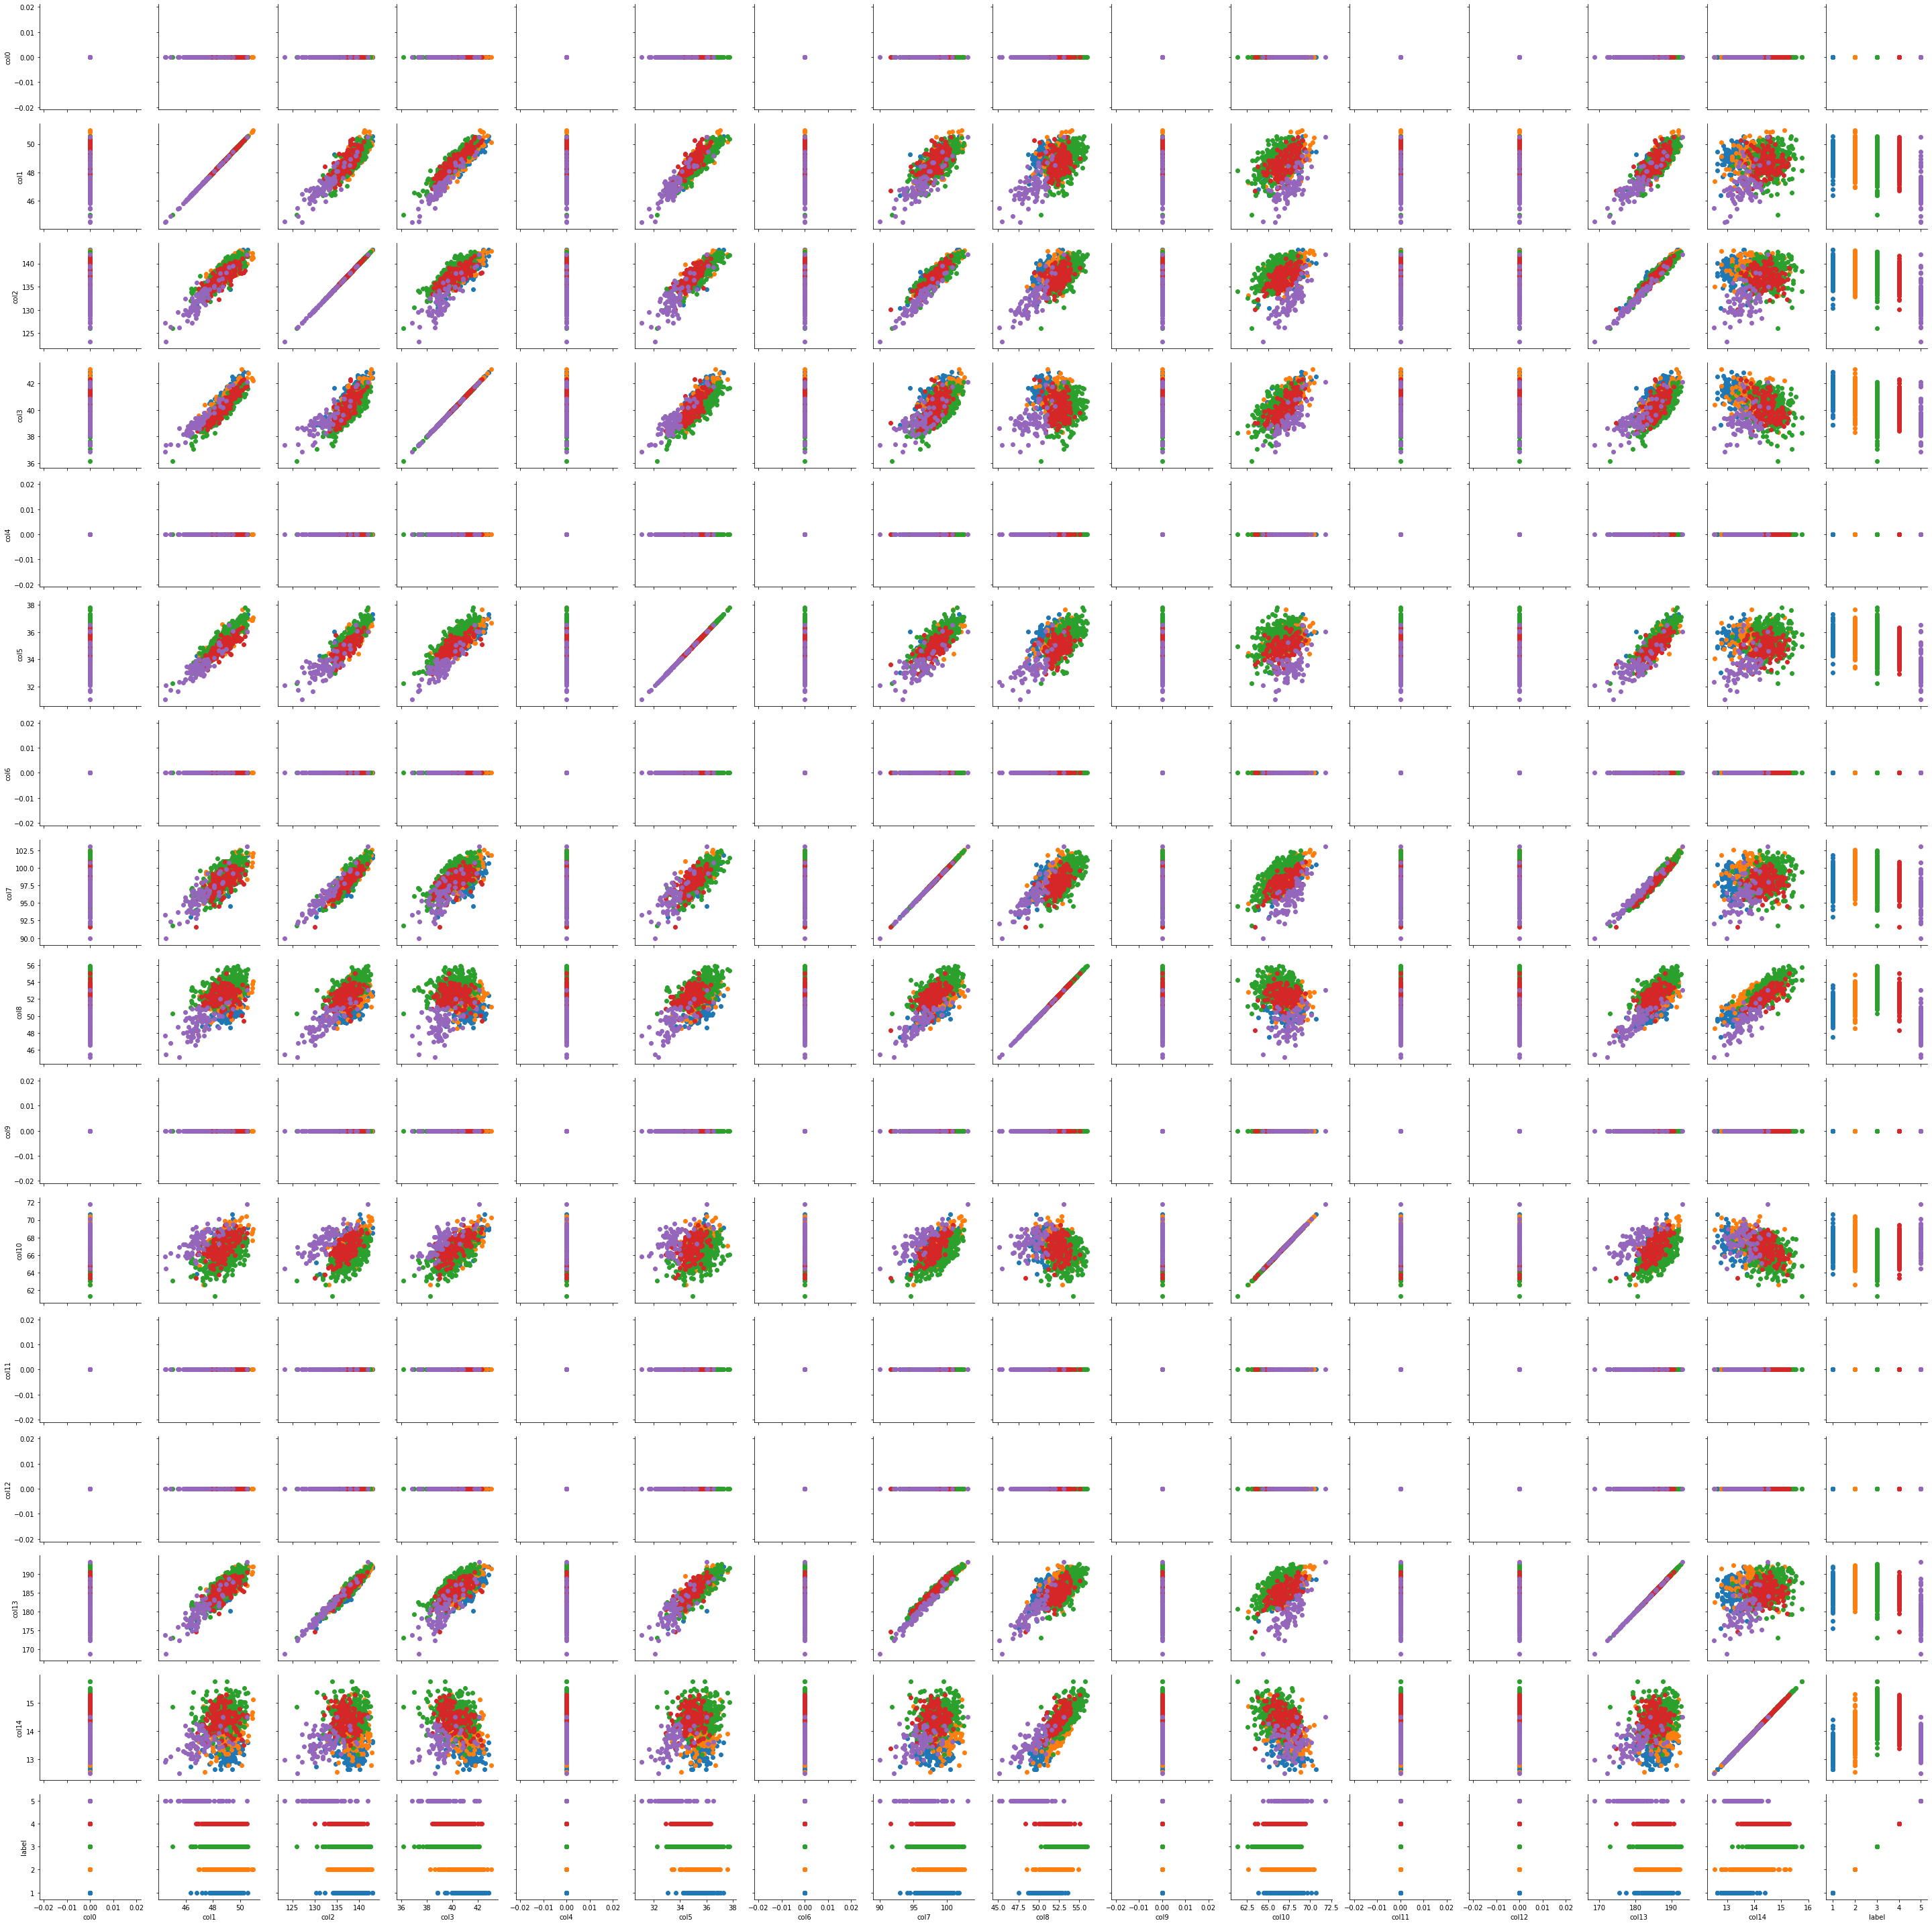

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import axes3d
g = sns.PairGrid(cluster_pd, hue = 'label')
g.map(plt.scatter);

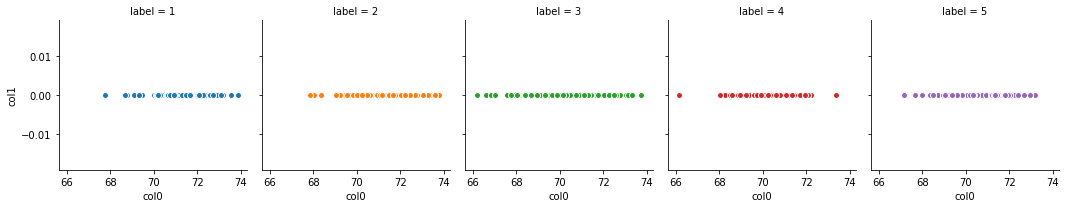

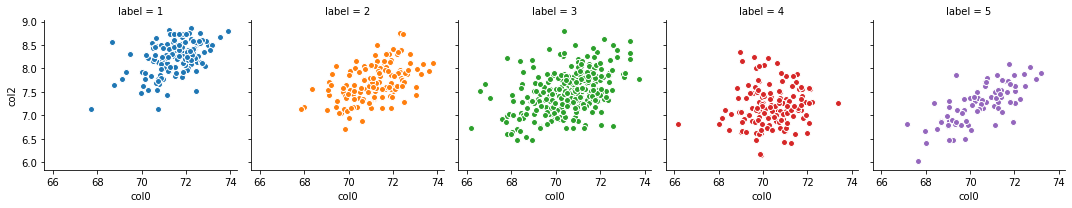

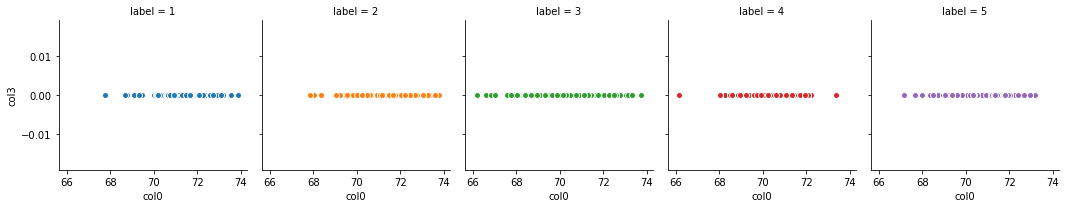

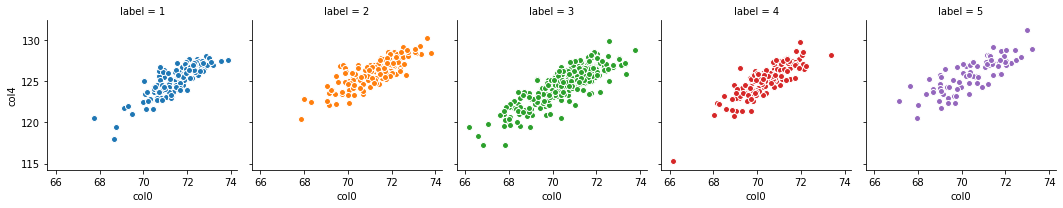

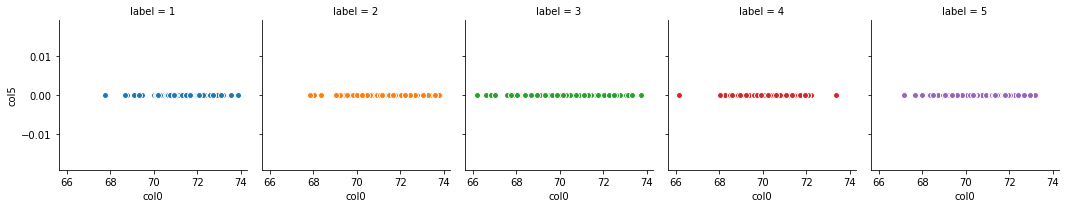

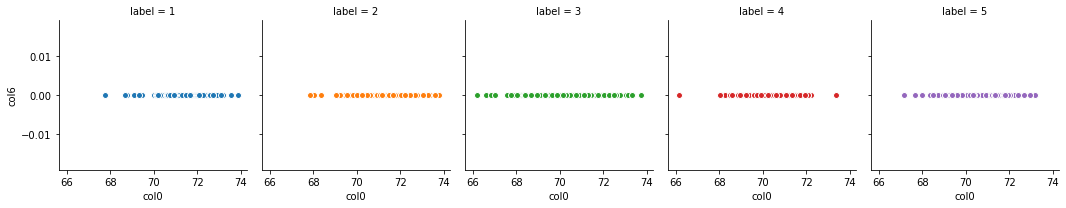

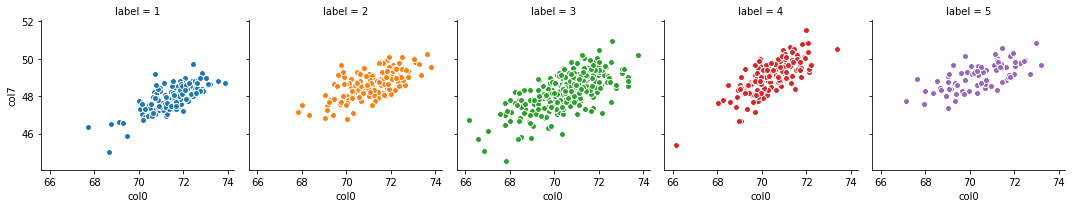

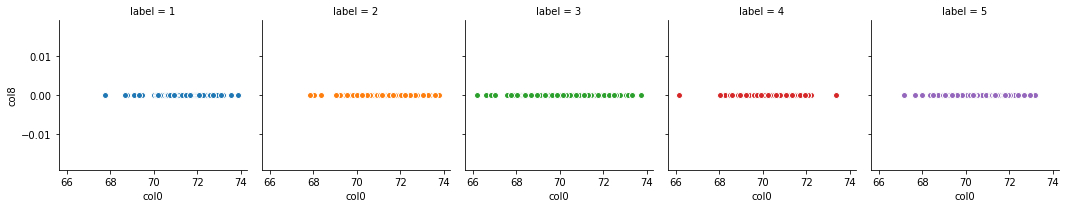

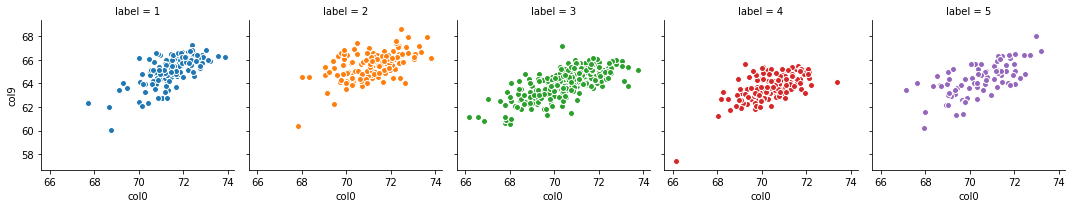

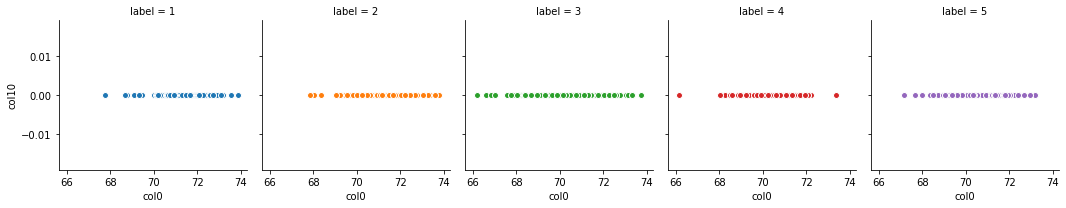

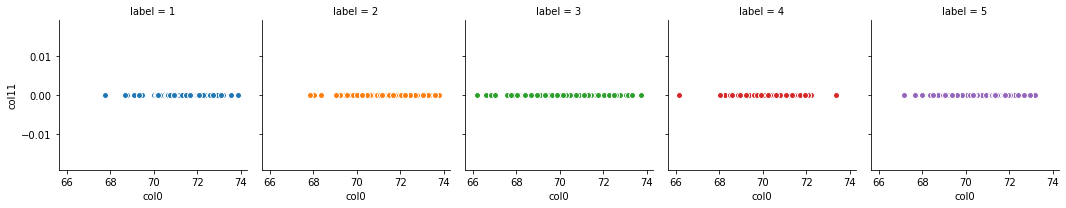

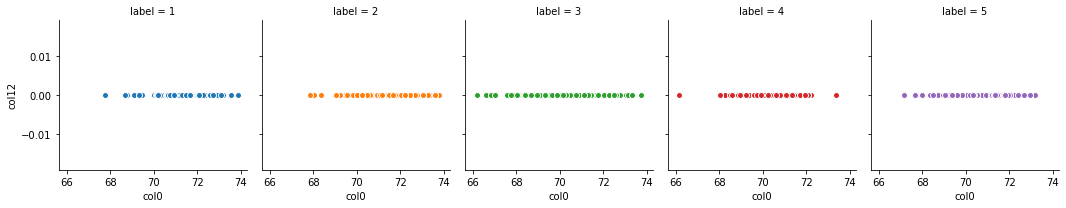

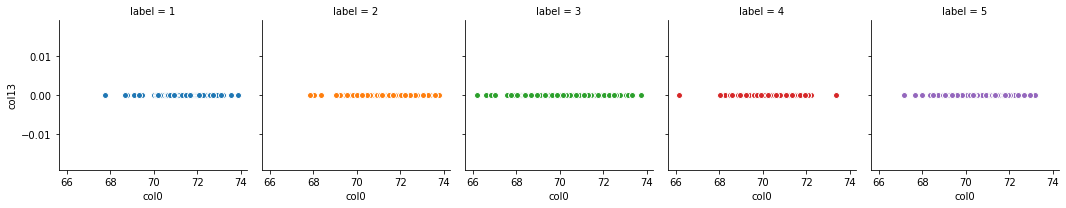

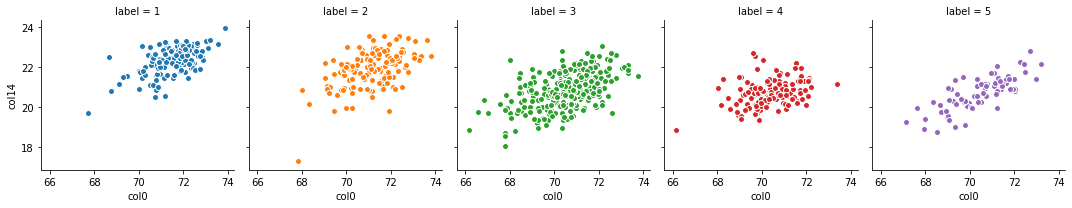

In [109]:
c1 = columns[0]
for c2 in columns[:-1]:
    if c1 == c2:
        continue

    g = sns.FacetGrid(cluster_pd, col="label", hue="label")
    g = (g.map(plt.scatter, c1, c2, edgecolor="w"))